In [1]:
from exploringShipLogbooks.config import non_slave_ships
from exploringShipLogbooks.classification import LogbookClassifier

C:\Users\Emma\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
cl = LogbookClassifier(classification_algorithm="Decision Tree")
cl.load_clean_and_classify(fuzz=False, export_csv=True)

Loading data...
Finding ship logs that mention slaves...
Found  464  logs that mention slaves
Finding training data...
Cleaning data...
Joining data sets...
Encoding data...
Extracting training and validation data...
Fiting classifier...
Validationg Classifier...

validation set 0  results:  Counter({0.0: 53, 1.0: 3})
validation set 1  results:  Counter({1.0: 6548, 0.0: 3})
Classifing unknown data...

94.43 of data was classified as  0.0
5.57 of data was classified as  1.0
Exporting data...


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DtypeWarning: Columns (5,6,7,8,11,13,18,19,23,24,25,26,28,29,30,34,35,38,43,44,46,73,77,81,82,84,85,87,88,94,96,97,98,99,111,114,116,119,120,122,124,125,127,129,131,133,135,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  from ipykernel import kernelapp as app


# example of how to access data from outside of the classifier

In [5]:
# data that was classified (unknown class before classification)
cl.unclassified_logs.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
0,5,83,175,307,1785,4
1,5,83,175,307,1789,4
2,17,46,38,93,1847,5
3,17,82,68,288,1849,4
9,5,83,406,36,1662,5


In [6]:
# data used for validation: 20% of slave voyage logs
cl.validation_set_2.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
1651,13,14,395,7,1816,3
1652,16,14,26,7,1816,3
1653,16,14,26,7,1816,3
1654,16,14,26,7,1816,3
1655,16,61,7,7,1817,3


In [7]:
# data used for validation: logs that mention slaves in cliwoc data set
cl.validation_set_1.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
16,5,92,221,341,1763,2
30,5,56,176,210,1786,2
40,5,91,263,324,1761,2
55,5,56,496,324,1773,2
746,5,83,42,210,1756,2


In [6]:
# data used for training classifier
cl.training_data.head()

,Nationality,ShipType,VoyageFrom,VoyageTo,Year,slave_logs
0,17,16,38,277,1848,1
1,17,15,68,247,1849,1
2,5,26,333,393,1807,1
3,5,83,363,210,1819,1
4,5,83,42,235,1750,1


# plots of original data (for poster)

In [100]:
file_name = './exploringShipLogbooks/data/tastdb-exp-2010'
slave_voyage_logs = pd.read_pickle(file_name)

In [75]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas as pd

In [148]:
len(pd.concat([cl.validation_set_2, cl.training_data]))

58957

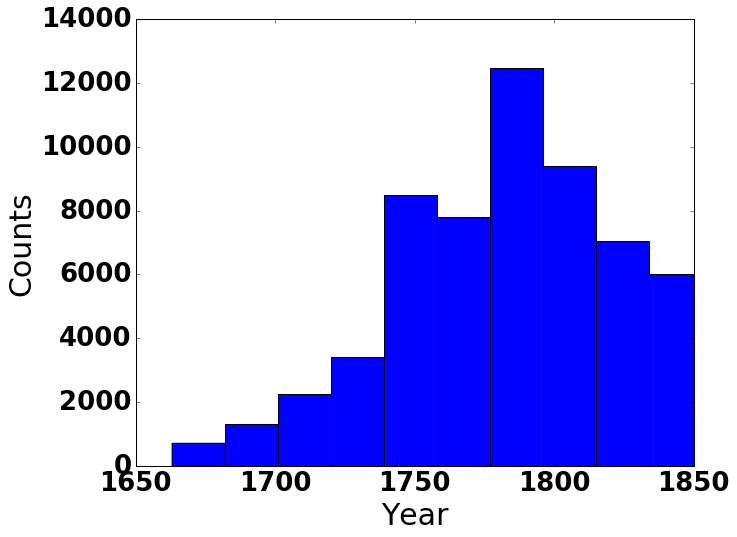

In [146]:
fig1, ax1 = plt.subplots()

ax1.hist(pd.concat([cl.validation_set_2, cl.training_data], ignore_index = True)['Year'])
ax1.set_xlabel('Year', fontsize = 30)
ax1.set_ylabel('Counts', fontsize = 30)
plt.xlim([1650, 1850])

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig1.set_size_inches(10, 8)

plt.savefig('slave_voyage_years.png')

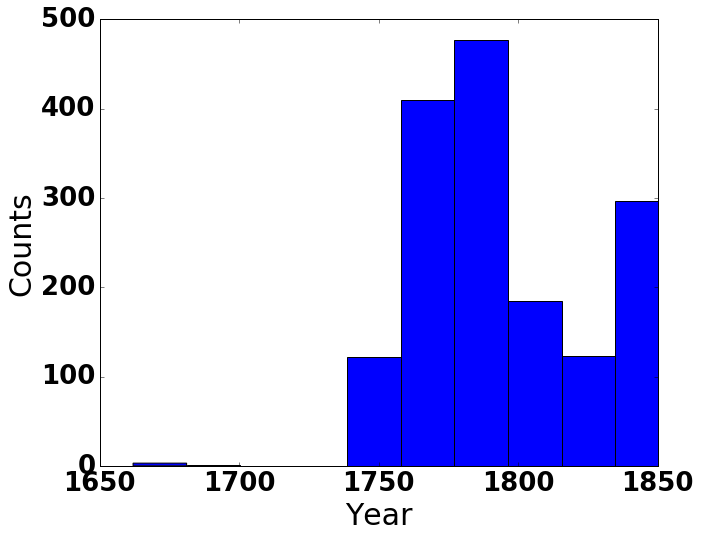

In [140]:
fig2, ax2 = plt.subplots()

ax2.hist(pd.concat([cl.validation_set_1, cl.unclassified_logs], ignore_index = True)['Year'])
ax2.set_xlabel('Year', fontsize = 30)
ax2.set_ylabel('Counts', fontsize = 30)
plt.xlim([1650, 1850])

for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(26) 

fig2.set_size_inches(10, 8)

plt.savefig('cliwoc_years.png')

In [151]:
slave_voyage_logs['rig'].unique()

array(['Bergantim', 'Galera', 'Brig', 'Schooner', 'Ship', 'Curveta',
       'Sumaca', 'Smack', 'Schooner-brig', 'Brigue-escuna', 'Cutter',
       'Charrua', 'Galeta', 'Brigantine', 'Hyate (iate)', 'Patacho',
       'Chalupa', 'Fregata', 'Barqua', 'Barque', 'Polacca schooner',
       'Pilot boat', 'Pailebot', 'Yacht', 'Launch', 'Buque', 'Felucca',
       'Galliot', 'Sloop', 'Palla', 'Pollaca', 'Steamer', 'Vessel',
       'Whaler', 'Charrua de guerra', 'Paquete', 'Fregat', 'Não',
       'Navio mercante', 'Penque', 'Corsario', 'Charrauinha', 'Balandra',
       'Berlin', 'Ketch', 'Fluit', 'Pinas', 'Yaght', 'Hekboot',
       'Barque (Dutch)', 'Hoeker', 'Snauw', 'Galjoot', 'Brik', 'Pink',
       'Dogger', 'Pinnace', 'Billd', 'Filibote', 'Caravela',
       'Nau-Caravela', 'Urca', 'Lugger', 'Vasca', 'Laud', 'Barca',
       'Lancha', 'Pangaio', 'Fragatihna', 'Galeão', 'Shalp'], dtype=object)

C:\Users\Emma\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1287: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


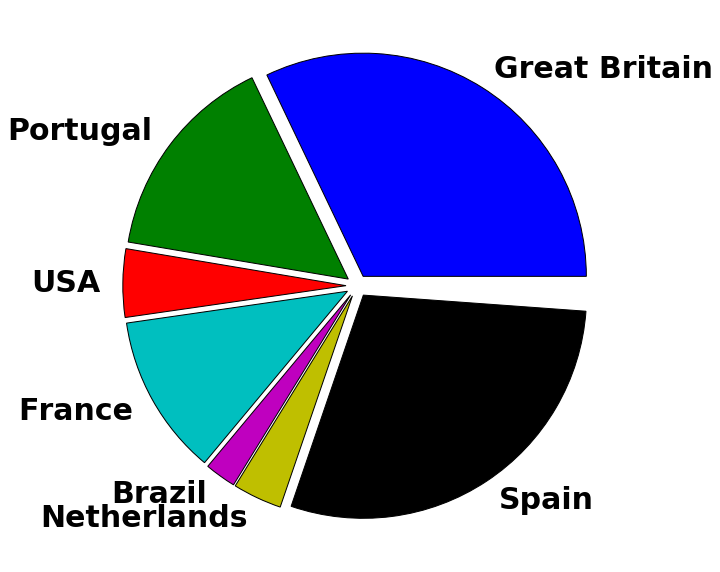

In [137]:
fractions = []
fract_dict = dict(slave_voyage_logs['national'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('slave_voyages_nats.png')

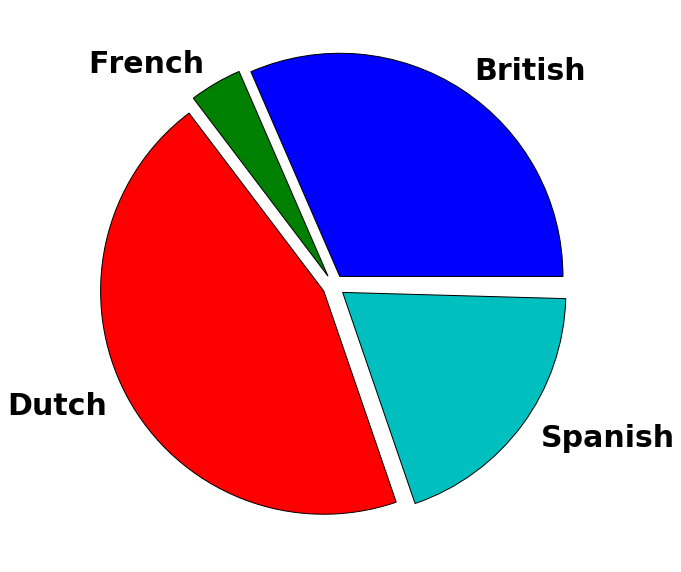

In [138]:
fractions = []
fract_dict = dict(cl.cliwoc_data_all['Nationality'].value_counts(normalize=True))
fractions = []
nats = []
for key in fract_dict:
    if fract_dict[key] > 0.01:
        nats.append(key)
        fractions.append(fract_dict[key])

explode=[0.05] * len(fractions)

fig2, ax2 = plt.subplots()
fig2.set_size_inches(10,10)
matplotlib.rcParams['font.size'] = 30

matplotlib.pylab.pie(fractions, labels = nats, explode = explode)

plt.savefig('cliwoc_nats.png')

In [143]:
len(cl.cliwoc_data_all.index.unique())

1651